Importing Libaries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading the Data

In [2]:

data = pd.read_csv("m1.csv", header=0)
df = data.T.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df.head()



,District,Total number of holdings,Total area (ha) of holdings,Total number of holdings of vegetable,Total number of holdings cultivating vegetable using local seeds,Total number of holdings cultivating vegetable using improved seeds,Total number of holdings cultivating vegetable using hybrid seeds,Total number of holdings cultivating vegetable using pesticides,Total number of holdings cultivating vegetable using green_slightly toxic pesticides,Total number of holdings cultivating vegetable using blue_moderately toxic pesticides,Total number of holdings cultivating vegetable using yellow_highly toxic pesticides,Total number of holdings cultivating vegetable using red_extremely toxic pesticides,Total number of holdings cultivating vegetable using local fertilizer,Total number of holdings cultivating vegetable using mineral_chemical fertilizer,Total number of holdings cultivating vegetable using both local and mineral_chemical fertilizer,Total area (ha) of holdings cultivating vegetable using mineral_chemical fertilizer,Total quantity (quintal) of mineral_chemical fertilizer used for vegetable
1,Taplejung,24032.0,20284.8,19423.0,18806.0,522.0,95.0,1195.0,787.0,408.0,0.0,0.0,18817.0,53.0,553.0,29.6,389.26
2,Sankhuwasabha,32372.0,25277.9,20883.0,19566.0,1217.0,101.0,881.0,327.0,494.0,60.0,0.0,20033.0,60.0,791.0,84.2,562.94
3,Solukhumbu,22797.0,15789.3,9287.0,8581.0,600.0,107.0,151.0,65.0,86.0,0.0,0.0,9258.0,0.0,29.0,1.3,17.66
4,Okhaldhunga,32408.0,22284.5,11324.0,10395.0,613.0,316.0,545.0,444.0,101.0,0.0,0.0,11177.0,48.0,99.0,11.1,45.11
5,Khotang,38131.0,25616.8,33617.0,30397.0,2775.0,445.0,1819.0,988.0,631.0,193.0,8.0,33086.0,14.0,516.0,24.5,183.83


Renaiming the Columns

In [3]:
new_column_names = {
    "Total number of holdings": "Total_Holdings",
    "Total area (ha) of holdings": "Total_Area",
    "Total number of holdings of vegetable": "VegHoldings",
    "Total number of holdings cultivating vegetable using local seeds": "Local_Seed",
    "Total number of holdings cultivating vegetable using improved seeds": "Improved_Seed",
    "Total number of holdings cultivating vegetable using hybrid seeds": "Hybrid_Seed",
    "Total number of holdings cultivating vegetable using pesticides": "Pesticide",
    "Total number of holdings cultivating vegetable using green_slightly toxic pesticides": "Green_Pesticide",
    "Total number of holdings cultivating vegetable using blue_moderately toxic pesticides": "Blue_Pesticide",
    "Total number of holdings cultivating vegetable using yellow_highly toxic pesticides": "Yellow_Pesticide",
    "Total number of holdings cultivating vegetable using red_extremely toxic pesticides": "Red_Pesticide",
    "Total number of holdings cultivating vegetable using local fertilizer": "Local_Fertilizer",
    "Total number of holdings cultivating vegetable using mineral_chemical fertilizer": "Chemical_Fertilizer",
    "Total number of holdings cultivating vegetable using both local and mineral_chemical fertilizer": "Both_Fertilizer",
    "Total area (ha) of holdings cultivating vegetable using mineral_chemical fertilizer": "Chemical_Fertilizer_ha",
    "Total quantity (quintal) of mineral_chemical fertilizer used for vegetable": "Chemical_Fertilizer_Quantity"
}
df.rename(columns=new_column_names, inplace=True)
numeric_columns = list(new_column_names.values())
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

                     Understanding the Data

In [185]:
df.head(4)

,District,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,...,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity,Non_Hazardous,Hazardous,Soil_Degradation_Risk,Pesticide_Toxicity_Index,Chemical_Fertilizer_Per_Hectare,Seed_Diversity_Score,Health_Hazard_Risk
1,Taplejung,24032.0,20284.8,19423.0,18806.0,522.0,95.0,1195.0,787.0,408.0,...,553.0,29.6,389.26,787.0,408.0,0,816.0,0.002613,19095.5,1
2,Sankhuwasabha,32372.0,25277.9,20883.0,19566.0,1217.0,101.0,881.0,327.0,494.0,...,791.0,84.2,562.94,327.0,554.0,1,1168.0,0.002374,20204.8,1
3,Solukhumbu,22797.0,15789.3,9287.0,8581.0,600.0,107.0,151.0,65.0,86.0,...,29.0,1.3,17.66,65.0,86.0,1,172.0,0.000000,8913.1,1
4,Okhaldhunga,32408.0,22284.5,11324.0,10395.0,613.0,316.0,545.0,444.0,101.0,...,99.0,11.1,45.11,444.0,101.0,0,202.0,0.002154,10796.3,0


In [61]:
df['Hybrid_Seed'].describe()

count       72.000000
mean      3628.236111
std       3927.515813
min         30.000000
25%        517.500000
50%       2062.500000
75%       5572.000000
max      17202.000000
Name: Hybrid_Seed, dtype: float64

In [192]:
df.tail(4)

,District,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,...,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity,Non_Hazardous,Hazardous,Soil_Degradation_Risk,Pesticide_Toxicity_Index,Chemical_Fertilizer_Per_Hectare,Seed_Diversity_Score,Health_Hazard_Risk
74,Doti,39572.0,12790.8,11499.0,9709.0,979.0,810.0,1062.0,759.0,288.0,...,784.0,25.9,44.97,759.0,302.0,0,618.0,0.001095,10441.5,0
75,Achham,45214.0,16453.9,13953.0,10672.0,2364.0,918.0,840.0,692.0,148.0,...,292.0,8.2,150.42,692.0,148.0,0,296.0,0.002735,12129.4,0
76,Kailali,127016.0,62734.2,59441.0,29582.0,19073.0,10786.0,20717.0,11994.0,7274.0,...,22897.0,907.6,3555.96,11994.0,8723.0,0,18947.0,0.113574,42354.3,1
77,Kanchanpur,86170.0,42249.0,71787.0,30564.0,27402.0,13820.0,14631.0,9170.0,3193.0,...,17920.0,577.5,2478.68,9170.0,5461.0,0,13252.0,0.071931,48411.0,1


In [5]:
df.describe()

,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,Yellow_Pesticide,Red_Pesticide,Local_Fertilizer,Chemical_Fertilizer,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,53646.597403,28810.515584,25682.727273,16592.493506,5691.844156,3398.467532,6857.584416,3645.883117,2279.051948,882.532468,50.103896,19701.051948,1179.610390,4802.077922,482.776623,1883.750909
std,32481.208115,21960.263548,20105.215822,12557.810182,7057.823921,3896.337418,8200.880125,4465.366434,2984.638654,1318.673941,108.346980,16295.282398,1801.393322,5669.632773,697.584853,3180.693435
min,951.000000,488.800000,384.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000
25%,31526.000000,12239.800000,11254.000000,7219.000000,773.000000,366.000000,840.000000,470.000000,207.000000,28.000000,0.000000,6756.000000,53.000000,604.000000,24.500000,99.120000
50%,49742.000000,24772.100000,20883.000000,13270.000000,3231.000000,1994.000000,3507.000000,1908.000000,1162.000000,322.000000,10.000000,15474.000000,357.000000,2231.000000,219.800000,562.940000
75%,67885.000000,35647.300000,34362.000000,24774.000000,6899.000000,5002.000000,9543.000000,5218.000000,2866.000000,1242.000000,35.000000,27417.000000,1527.000000,7514.000000,581.700000,2107.330000
max,148133.000000,98232.600000,102264.000000,64624.000000,34948.000000,17202.000000,38690.000000,24634.000000,17628.000000,7052.000000,640.000000,92634.000000,7377.000000,22897.000000,2872.800000,20024.620000


In [186]:
df.shape

(72, 24)

Null Values

In [ ]:
df.isnull().sum()
# no null values

Duplicate Values

In [ ]:
df.duplicated().sum()

In [ ]:
df.duplicated(["District"]).sum()
# no duplicate values

EDA

  
  

  
      Scatter Plot and Handling Outliers

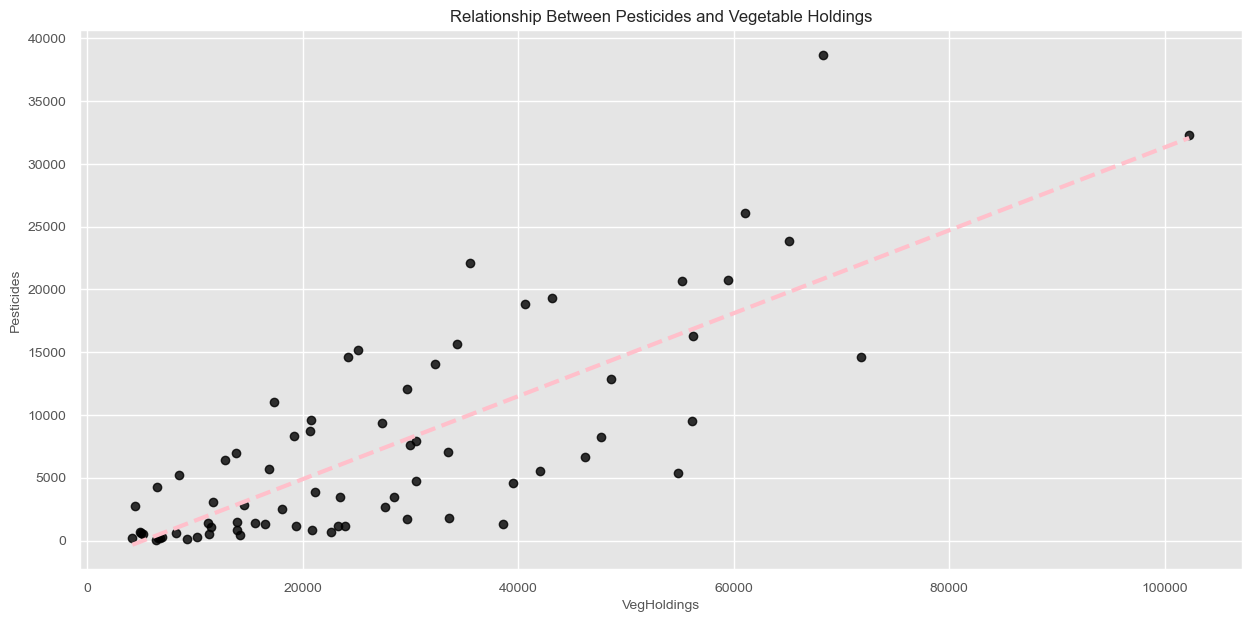

In [13]:
# Scatter Plot
plt.figure(figsize=(15,7))
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
sns.set_palette("coolwarm")
sns.regplot(x=df["VegHoldings"],y=df["Pesticide"],color="black",ci=None,
            line_kws={"color": "pink", "linewidth": 3, "linestyle": "--"})
plt.title("Relationship Between Pesticides and Vegetable Holdings",fontsize=12)
plt.xlabel("VegHoldings",fontsize=10)
plt.ylabel("Pesticides",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()






        Conclusion from the Diagram
        

 Outliers are crucial in this analysis as they may indicate districts with extremely high pesticide usage,  which is key for identifying areas requiring intervention. Therefore, including them is essential. 

Bar Chart

Total Number of Agricultural Holdings by District

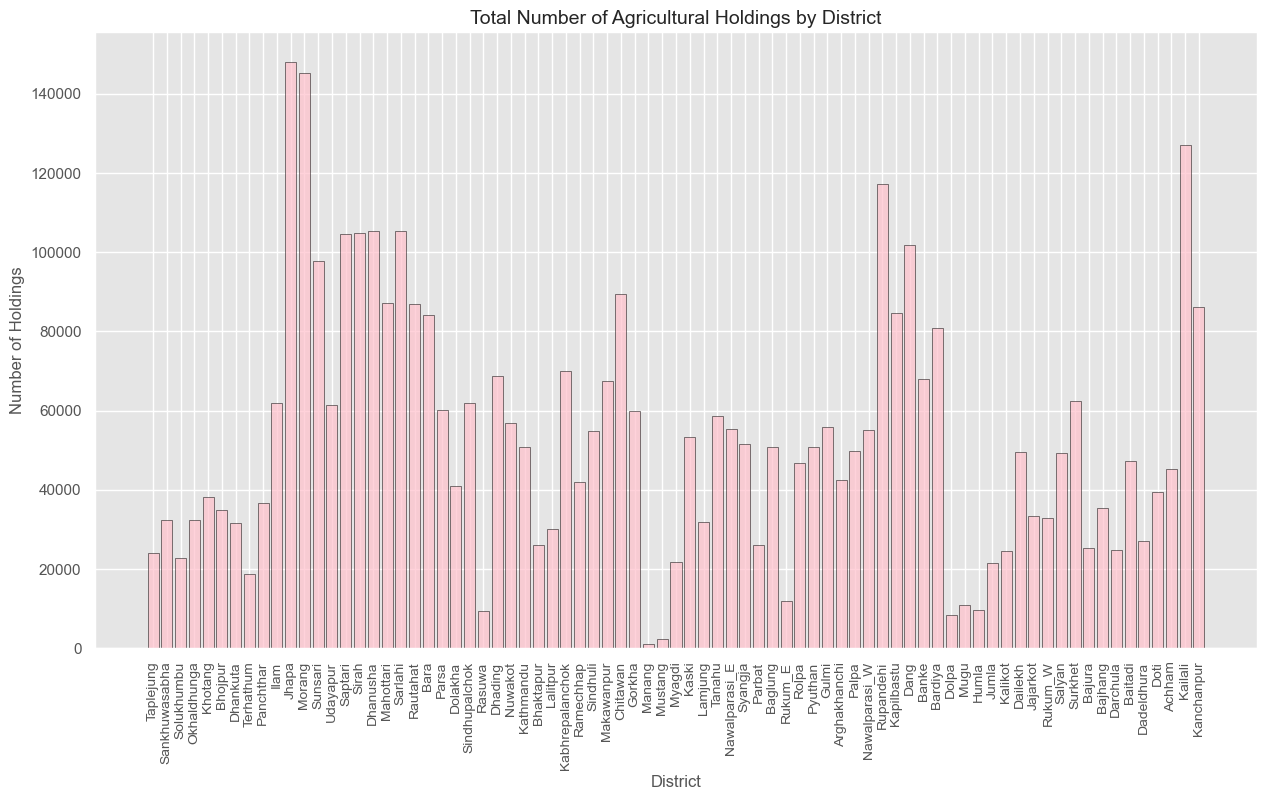

In [7]:
plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['Total_Holdings'], color='pink', edgecolor='black',alpha=0.7)
plt.title('Total Number of Agricultural Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Total Number of Vegetable Holdings by District

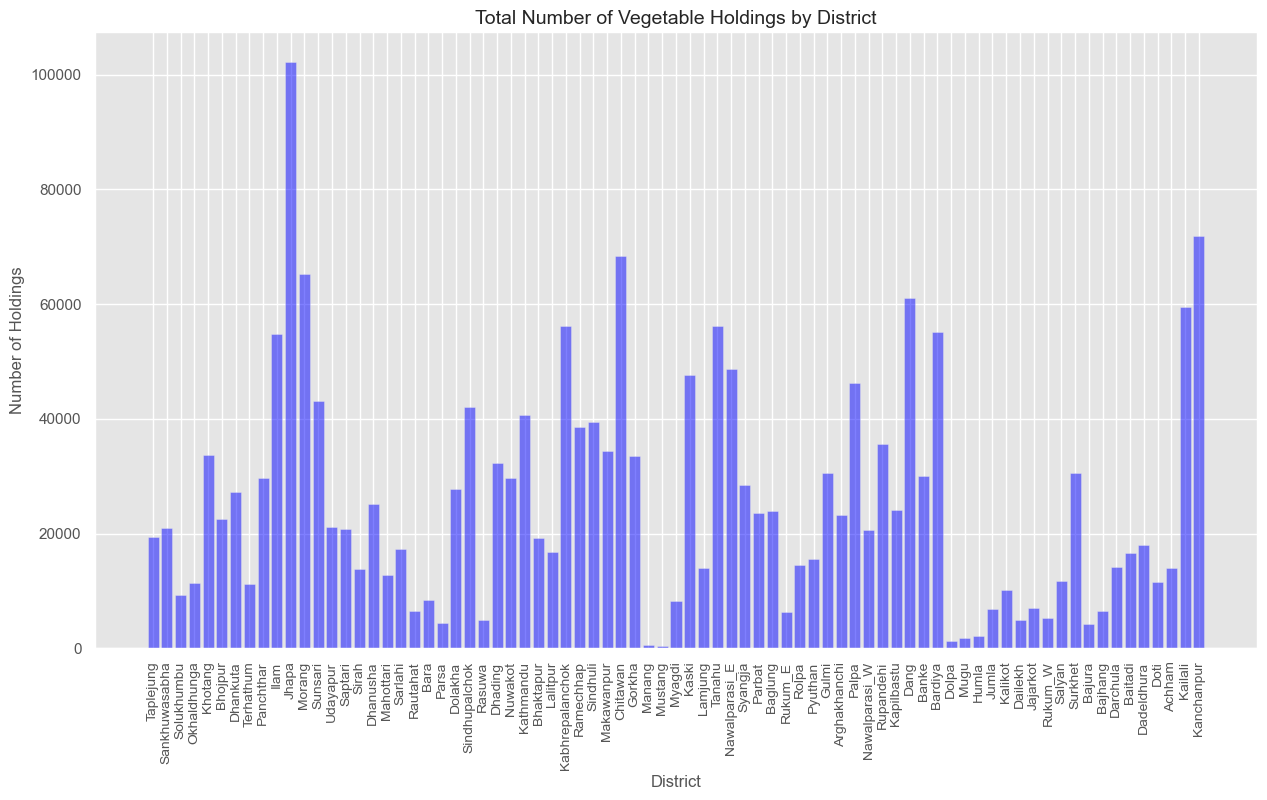

In [8]:

plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['VegHoldings'], color='Blue',alpha=0.5)
plt.title('Total Number of Vegetable Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Districts that do not contribute in  vegetables farming are removed

In [4]:

df = df.drop(df[df["District"].isin(
    ["Mustang", "Manang", "Dolpa", "Mugu", "Humla"])].index)

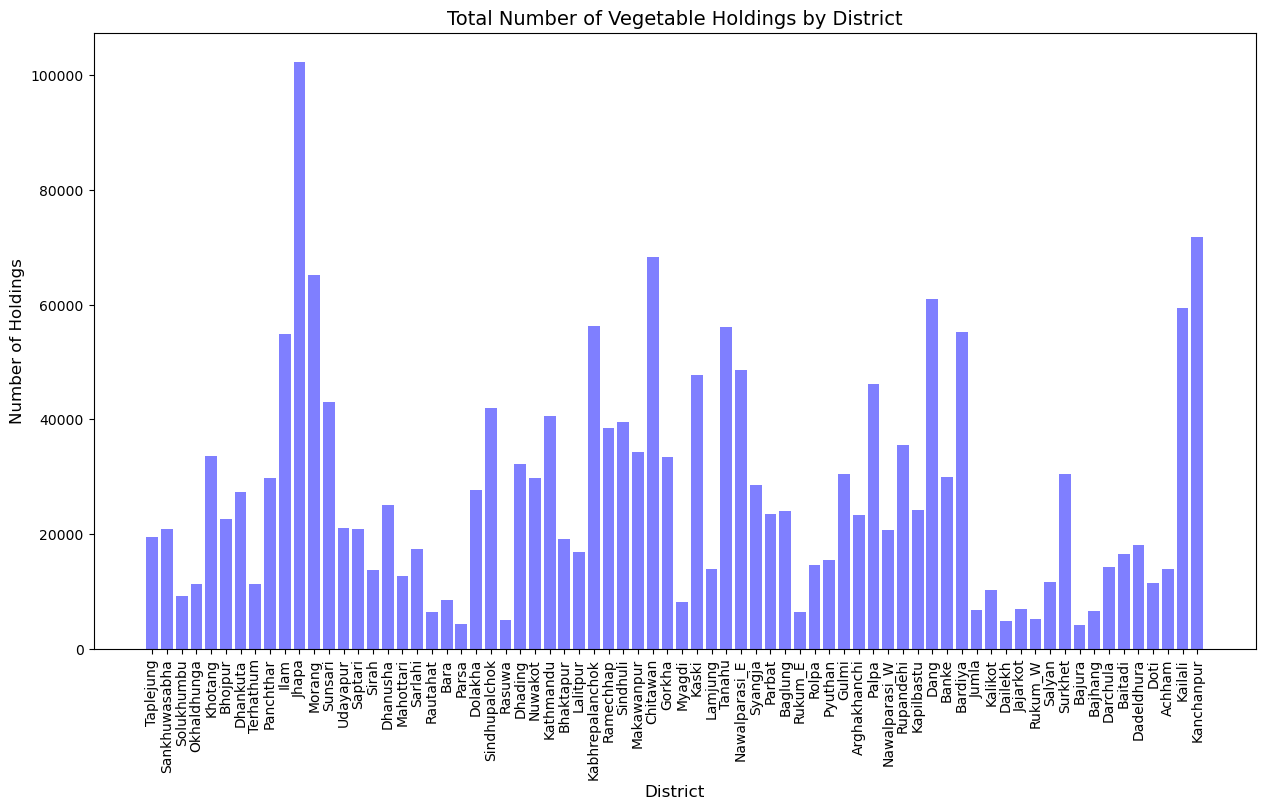

In [64]:

plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['VegHoldings'], color='Blue',alpha=0.5)
plt.title('Total Number of Vegetable Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Total Number of Holdings Using Pesticides by District

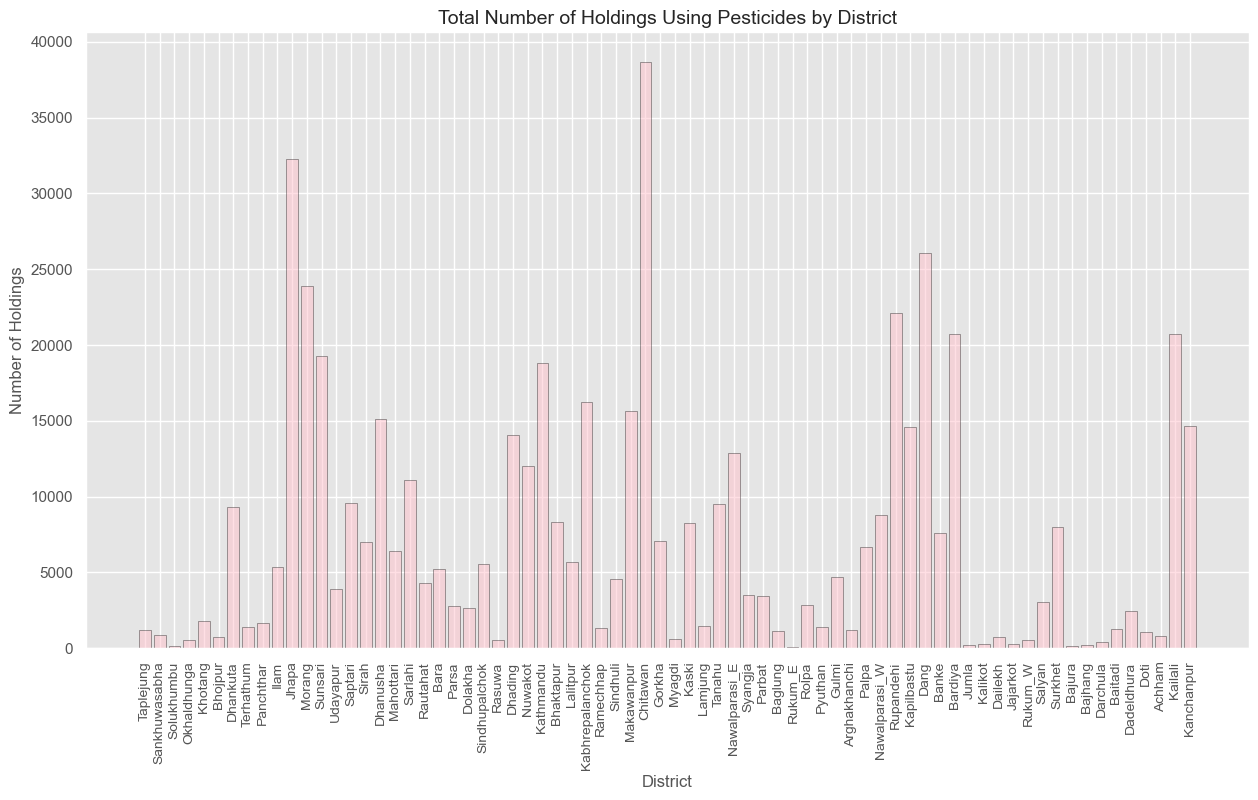

In [11]:
plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['Pesticide'], color='Pink', edgecolor='black', alpha=0.5)
plt.title('Total Number of Holdings Using Pesticides by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Pie Chart

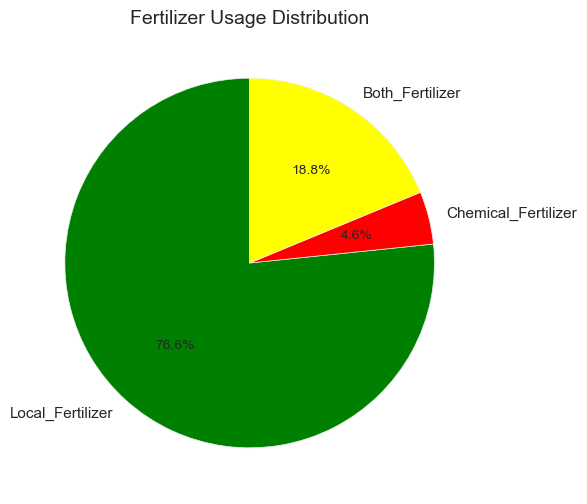

In [15]:
fertilizer_columns = ['Local_Fertilizer', 'Chemical_Fertilizer', 'Both_Fertilizer']
fertilizer_df = df[fertilizer_columns].sum()

plt.figure(figsize=(8, 6))
plt.pie(fertilizer_df, labels=fertilizer_df.index, autopct='%1.1f%%', startangle=90, colors=['Green', 'Red', 'Yellow'])
plt.title('Fertilizer Usage Distribution', fontsize=14)
plt.show()

Heatmap

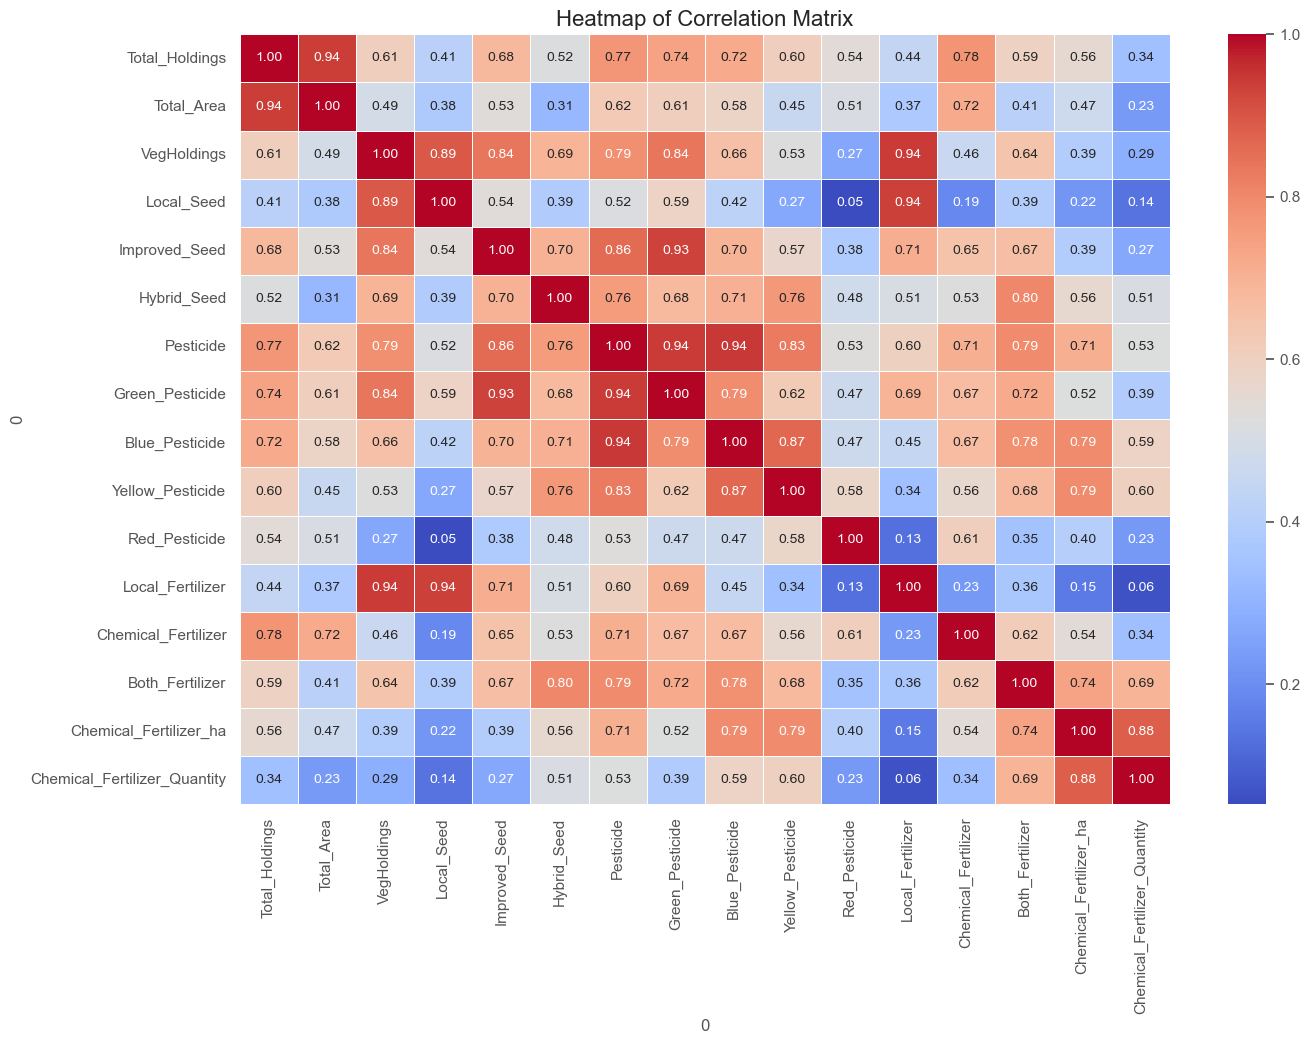

In [38]:

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()





Feature Engineering

In [26]:

df['Non_Hazardous'] = df['Green_Pesticide']
df['Hazardous'] = df['Blue_Pesticide'] + df['Yellow_Pesticide'] + df['Red_Pesticide']
df['Soil_Degradation_Risk'] = np.where(df['Hazardous'] > df['Non_Hazardous'], 1, 0)
df['Pesticide_Toxicity_Index'] = (
    df['Red_Pesticide'] * 4 +
    df['Yellow_Pesticide'] * 3 +
    df['Blue_Pesticide'] * 2
)
df['Chemical_Fertilizer_Per_Hectare'] = df['Chemical_Fertilizer'] / df['Total_Area']
df['Seed_Diversity_Score'] = df['Local_Seed'] + 0.5 * df['Improved_Seed'] + 0.3 * df['Hybrid_Seed']

In [27]:

df['Health_Hazard_Risk'] = np.where(df['Pesticide_Toxicity_Index'] > df['Green_Pesticide'], 1, 0)

Selecting Features and selecting training and testing data for soil degradation

In [65]:

soil_features = [
    'Total_Holdings', 'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index', 'Chemical_Fertilizer_Per_Hectare'
]
X_soil = df[soil_features]
y_soil = df['Soil_Degradation_Risk']
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(
    X_soil, y_soil, test_size=0.2, random_state=42)


Building predictive model(Random Forest Classifier)

In [66]:
model_soil_1 = RandomForestClassifier(random_state=42)
model_soil_1.fit(X_train_soil, y_train_soil)
y_pred_soil_rf = model_soil_1.predict(X_test_soil)


Xgb boost

In [67]:
model_soil_2=XGBClassifier(random_state=42)
model_soil_2.fit(X_train_soil,y_train_soil)
y_pred_soil_xgb=model_soil_2.predict(X_test_soil)


In [68]:
print("Soil Degradation Model Results Random Forest Classifier:")
print(confusion_matrix(y_test_soil, y_pred_soil_rf))
print(classification_report(y_test_soil, y_pred_soil_rf))

print("Soil Degradation Model Results XGB Boost :")
print(confusion_matrix(y_test_soil, y_pred_soil_xgb))
print(classification_report(y_test_soil, y_pred_soil_xgb))


Soil Degradation Model Results Random Forest Classifier:
[[12  0]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.96      0.83      0.88        15
weighted avg       0.94      0.93      0.93        15

Soil Degradation Model Results XGB Boost :
[[11  1]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.50      0.33      0.40         3

    accuracy                           0.80        15
   macro avg       0.67      0.62      0.64        15
weighted avg       0.78      0.80      0.78        15



Selecting features for training and testing data (health )



In [69]:

health_features = [
     'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index'
]
X_health = df[health_features]
y_health = df['Health_Hazard_Risk']
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X_health, y_health, test_size=0.3, random_state=42)



Training random forest classifier 

In [70]:

model_health_1 = RandomForestClassifier(random_state=42)
model_health_1.fit(X_train_health, y_train_health)
y_pred_health_rf = model_health_1.predict(X_test_health)

Training Xgboost

In [71]:

model_health_2 = XGBClassifier(random_state=42)
model_health_2.fit(X_train_health, y_train_health)
y_pred_health_xgb = model_health_2.predict(X_test_health)

In [72]:
print("Health Hazard Model Results:")
print(confusion_matrix(y_test_health, y_pred_health_rf))
print(classification_report(y_test_health, y_pred_health_rf))
print("Health Hazard Model Results:")
print(confusion_matrix(y_test_health, y_pred_health_xgb))
print(classification_report(y_test_health, y_pred_health_xgb))



Health Hazard Model Results:
[[ 1  2]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.90      0.95      0.92        19

    accuracy                           0.86        22
   macro avg       0.70      0.64      0.66        22
weighted avg       0.85      0.86      0.85        22

Health Hazard Model Results:
[[ 1  2]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.89      0.84      0.86        19

    accuracy                           0.77        22
   macro avg       0.57      0.59      0.58        22
weighted avg       0.80      0.77      0.79        22



KNN for Health Hazard and Soil Degradation

In [73]:

def apply_log_transformation(column):
    return np.log(column + 1) 

columns_to_transform = [
    "Total_Holdings", "Total_Area", "VegHoldings",
    "Chemical_Fertilizer", "Chemical_Fertilizer_Quantity"
]
for col in columns_to_transform:
    df[f"{col}_Log"] = apply_log_transformation(df[col])

soil_features = [
    'Total_Holdings_Log', 'VegHoldings_Log', 
    'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer_Log',
    'Pesticide_Toxicity_Index', 'Chemical_Fertilizer_Per_Hectare'
]
X_soil = df[soil_features]
y_soil = df['Soil_Degradation_Risk']

health_features = [
    'VegHoldings_Log', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer_Log',
    'Pesticide_Toxicity_Index'
]
X_health = df[health_features]
y_health = df['Health_Hazard_Risk']

X_train_soil,X_test_soil,y_train_soil,y_test_soil =train_test_split(
X_soil, y_soil, test_size=0.3, random_state=42)
X_train_health,X_test_health,y_train_health,y_test_health =train_test_split(
X_health, y_health, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_soil_scaled = scaler.fit_transform(X_train_soil)
X_test_soil_scaled = scaler.transform(X_test_soil)
X_train_health_scaled = scaler.fit_transform(X_train_health)
X_test_health_scaled = scaler.transform(X_test_health)

knn_soil = KNeighborsClassifier(n_neighbors=5)
knn_soil.fit(X_train_soil_scaled, y_train_soil)
y_pred_soil = knn_soil.predict(X_test_soil_scaled)

print("Soil Degradation Model Results (KNN):")
print(confusion_matrix(y_test_soil, y_pred_soil))
print(classification_report(y_test_soil, y_pred_soil))

knn_health = KNeighborsClassifier(n_neighbors=5)
knn_health.fit(X_train_health_scaled, y_train_health)
y_pred_health = knn_health.predict(X_test_health_scaled)

print("Health Hazard Model Results (KNN):")
print(confusion_matrix(y_test_health, y_pred_health))
print(classification_report(y_test_health, y_pred_health))

Soil Degradation Model Results (KNN):
[[15  1]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.75      0.50      0.60         6

    accuracy                           0.82        22
   macro avg       0.79      0.72      0.74        22
weighted avg       0.81      0.82      0.81        22

Health Hazard Model Results (KNN):
[[ 0  3]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.86      0.95      0.90        19

    accuracy                           0.82        22
   macro avg       0.43      0.47      0.45        22
weighted avg       0.74      0.82      0.78        22



Cross Validation

In [74]:

# Cross-validation for Soil Degradation (Random Forest)
cv_results_soil_rf = {
    'Accuracy': cross_val_score(model_soil_1, X_soil, y_soil, cv=5, scoring='accuracy'),
    'Precision': cross_val_score(model_soil_1, X_soil, y_soil, cv=5, scoring='precision'),
    'Recall': cross_val_score(model_soil_1, X_soil, y_soil, cv=5, scoring='recall'),
    'F1-Score': cross_val_score(model_soil_1, X_soil, y_soil, cv=5, scoring='f1')
}
cv_results_soil_rf_df = pd.DataFrame(cv_results_soil_rf)
print("Cross-Validation Results for Soil Degradation (Random Forest):")
print(cv_results_soil_rf_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Results for Soil Degradation (Random Forest):
   Accuracy  Precision  Recall  F1-Score
0  0.666667        0.5    0.40  0.444444
1  1.000000        1.0    1.00  1.000000
2  0.714286        0.0    0.00  0.000000
3  0.642857        0.0    0.00  0.000000
4  0.785714        1.0    0.25  0.400000


In [75]:
# Cross-validation for Soil Degradation (XGBoost)
cv_results_soil_xgb = {
    'Accuracy': cross_val_score(model_soil_2, X_soil, y_soil, cv=5, scoring='accuracy'),
    'Precision': cross_val_score(model_soil_2, X_soil, y_soil, cv=5, scoring='precision'),
    'Recall': cross_val_score(model_soil_2, X_soil, y_soil, cv=5, scoring='recall'),
    'F1-Score': cross_val_score(model_soil_2, X_soil, y_soil, cv=5, scoring='f1')
}
cv_results_soil_xgb_df = pd.DataFrame(cv_results_soil_xgb)
print("Cross-Validation Results for Soil Degradation (XGBoost):")
print(cv_results_soil_xgb_df)

Cross-Validation Results for Soil Degradation (XGBoost):
   Accuracy  Precision  Recall  F1-Score
0  0.666667   0.500000    0.40  0.444444
1  0.733333   0.555556    1.00  0.714286
2  0.785714   0.666667    0.50  0.571429
3  0.642857   0.000000    0.00  0.000000
4  0.785714   1.000000    0.25  0.400000


In [76]:
# Cross-validation for Health Hazard (Random Forest)
cv_results_health_rf = {
    'Accuracy': cross_val_score(model_health_1, X_health, y_health, cv=5, scoring='accuracy'),
    'Precision': cross_val_score(model_health_1, X_health, y_health, cv=5, scoring='precision'),
    'Recall': cross_val_score(model_health_1, X_health, y_health, cv=5, scoring='recall'),
    'F1-Score': cross_val_score(model_health_1, X_health, y_health, cv=5, scoring='f1')
}
cv_results_health_rf_df = pd.DataFrame(cv_results_health_rf)
print("Cross-Validation Results for Health Hazard (Random Forest):")
print(cv_results_health_rf_df)

Cross-Validation Results for Health Hazard (Random Forest):
   Accuracy  Precision    Recall  F1-Score
0  0.733333   0.833333  0.833333  0.833333
1  0.800000   0.800000  1.000000  0.888889
2  0.857143   0.857143  1.000000  0.923077
3  0.785714   0.785714  1.000000  0.880000
4  0.642857   0.875000  0.636364  0.736842


In [77]:
# Cross-validation for Health Hazard (XGBoost)
cv_results_health_xgb = {
    'Accuracy': cross_val_score(model_health_2, X_health, y_health, cv=5, scoring='accuracy'),
    'Precision': cross_val_score(model_health_2, X_health, y_health, cv=5, scoring='precision'),
    'Recall': cross_val_score(model_health_2, X_health, y_health, cv=5, scoring='recall'),
    'F1-Score': cross_val_score(model_health_2, X_health, y_health, cv=5, scoring='f1')
}
cv_results_health_xgb_df = pd.DataFrame(cv_results_health_xgb)
print("Cross-Validation Results for Health Hazard (XGBoost):")
print(cv_results_health_xgb_df)

Cross-Validation Results for Health Hazard (XGBoost):
   Accuracy  Precision    Recall  F1-Score
0  0.666667   0.888889  0.666667  0.761905
1  0.866667   0.857143  1.000000  0.923077
2  0.785714   0.846154  0.916667  0.880000
3  0.785714   0.833333  0.909091  0.869565
4  0.642857   0.875000  0.636364  0.736842


In [78]:
# Summary for Soil Degradation
summary_soil_cv = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Mean Accuracy': [
        cv_results_soil_rf_df['Accuracy'].mean(),
        cv_results_soil_xgb_df['Accuracy'].mean()
 
    ],
    'Mean Precision': [
        cv_results_soil_rf_df['Precision'].mean(),
        cv_results_soil_xgb_df['Precision'].mean()
   
    ],
    'Mean Recall': [
        cv_results_soil_rf_df['Recall'].mean(),
        cv_results_soil_xgb_df['Recall'].mean()
       
    ],
    'Mean F1-Score': [
        cv_results_soil_rf_df['F1-Score'].mean(),
        cv_results_soil_xgb_df['F1-Score'].mean()
       
    ]
})

# Summary for Health Hazard
summary_health_cv = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Mean Accuracy': [
        cv_results_health_rf_df['Accuracy'].mean(),
        cv_results_health_xgb_df['Accuracy'].mean()
    
    ],
    'Mean Precision': [
        cv_results_health_rf_df['Precision'].mean(),
        cv_results_health_xgb_df['Precision'].mean()
   
    ],
    'Mean Recall': [
        cv_results_health_rf_df['Recall'].mean(),
        cv_results_health_xgb_df['Recall'].mean()
        
    ],
    'Mean F1-Score': [
        cv_results_health_rf_df['F1-Score'].mean(),
        cv_results_health_xgb_df['F1-Score'].mean(),
       
    ]
})

print("Summary of Cross-Validation Results for Soil Degradation:")
print(summary_soil_cv)

print("Summary of Cross-Validation Results for Health Hazard:")
print(summary_health_cv)

Summary of Cross-Validation Results for Soil Degradation:
           Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1-Score
0  Random Forest       0.761905        0.500000         0.33       0.368889
1        XGBoost       0.722857        0.544444         0.43       0.426032
Summary of Cross-Validation Results for Health Hazard:
           Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1-Score
0  Random Forest       0.763810        0.830238     0.893939       0.852428
1        XGBoost       0.749524        0.860104     0.825758       0.834278


Soil Degradation Feature Importance (Random Forest):
                           Feature  Importance (Random Forest)
7         Pesticide_Toxicity_Index                    0.182733
0                   Total_Holdings                    0.123557
5                 Local_Fertilizer                    0.112570
3                    Improved_Seed                    0.108242
6              Chemical_Fertilizer                    0.102561
2                       Local_Seed                    0.097922
4                      Hybrid_Seed                    0.093435
1                      VegHoldings                    0.090636
8  Chemical_Fertilizer_Per_Hectare                    0.088344

Soil Degradation Feature Importance (XGBoost):
                           Feature  Importance (XGBoost)
5                 Local_Fertilizer              0.186072
4                      Hybrid_Seed              0.186066
7         Pesticide_Toxicity_Index              0.155588
3                    Improved_Seed       

/var/folders/b2/bxzmf0jd2hv8w93z8x768cjm0000gn/T/ipykernel_10736/2670201111.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (Random Forest)', y='Feature', data=soil_rf_importance_df, palette='viridis')


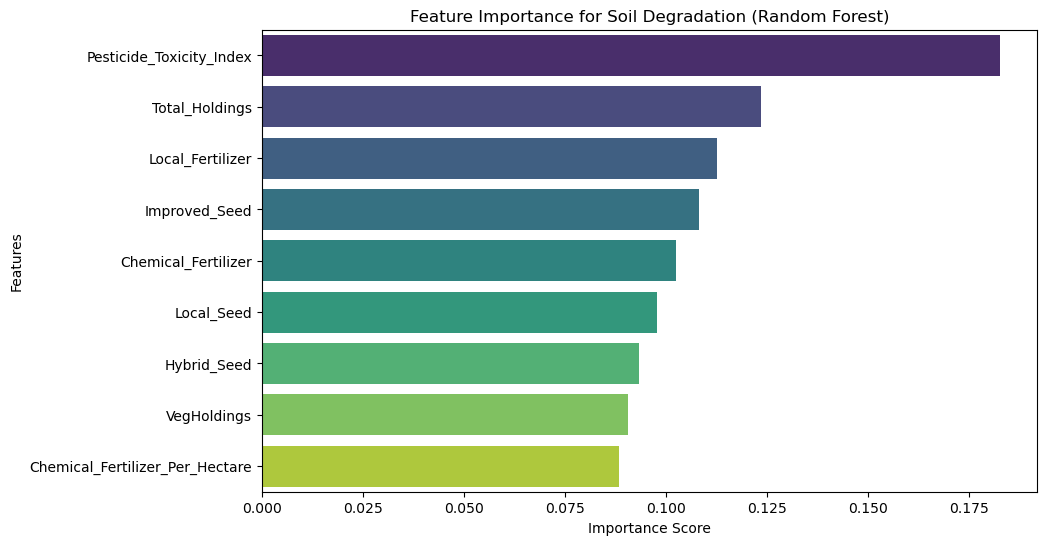

/var/folders/b2/bxzmf0jd2hv8w93z8x768cjm0000gn/T/ipykernel_10736/2670201111.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (XGBoost)', y='Feature', data=soil_xgb_importance_df, palette='coolwarm')


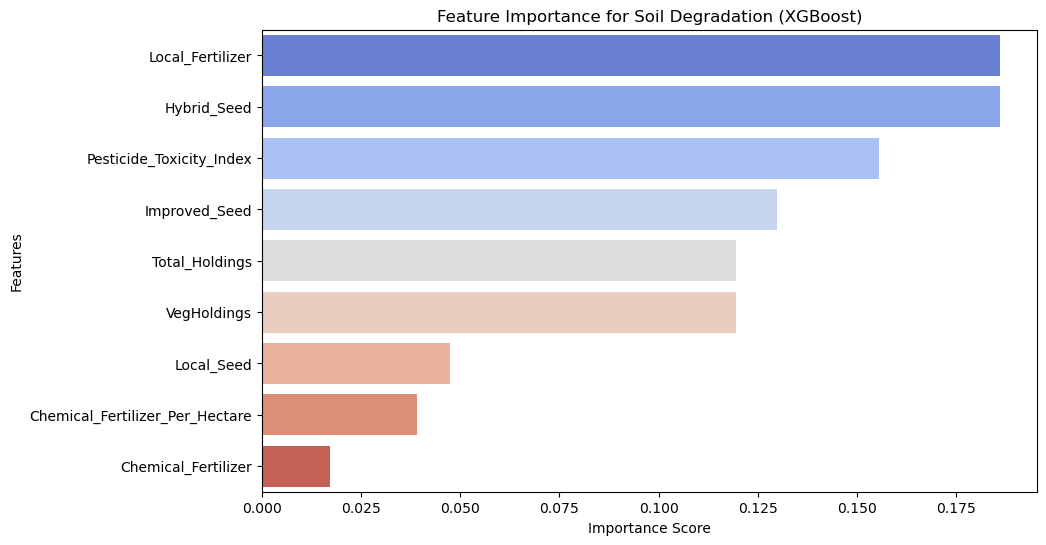

Health Hazard Feature Importance (Random Forest):
                    Feature  Importance (Random Forest)
6  Pesticide_Toxicity_Index                    0.222615
5       Chemical_Fertilizer                    0.161903
3               Hybrid_Seed                    0.152779
0               VegHoldings                    0.129842
4          Local_Fertilizer                    0.115628
2             Improved_Seed                    0.109458
1                Local_Seed                    0.107775

Health Hazard Feature Importance (XGBoost):
                    Feature  Importance (XGBoost)
5       Chemical_Fertilizer              0.316444
6  Pesticide_Toxicity_Index              0.287373
3               Hybrid_Seed              0.160050
0               VegHoldings              0.062717
4          Local_Fertilizer              0.060422
2             Improved_Seed              0.058154
1                Local_Seed              0.054840


/var/folders/b2/bxzmf0jd2hv8w93z8x768cjm0000gn/T/ipykernel_10736/2670201111.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (Random Forest)', y='Feature', data=health_rf_importance_df, palette='viridis')


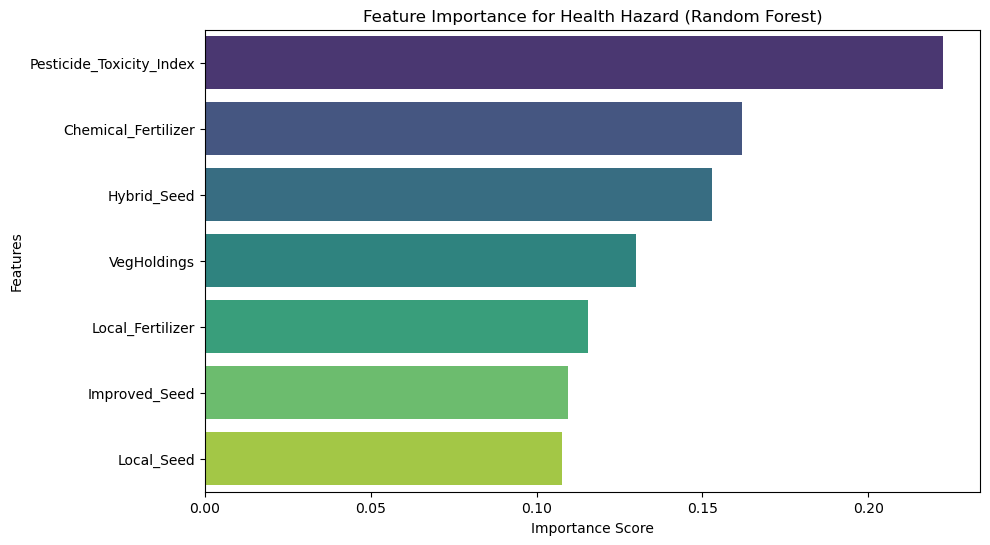

/var/folders/b2/bxzmf0jd2hv8w93z8x768cjm0000gn/T/ipykernel_10736/2670201111.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (XGBoost)', y='Feature', data=health_xgb_importance_df, palette='coolwarm')


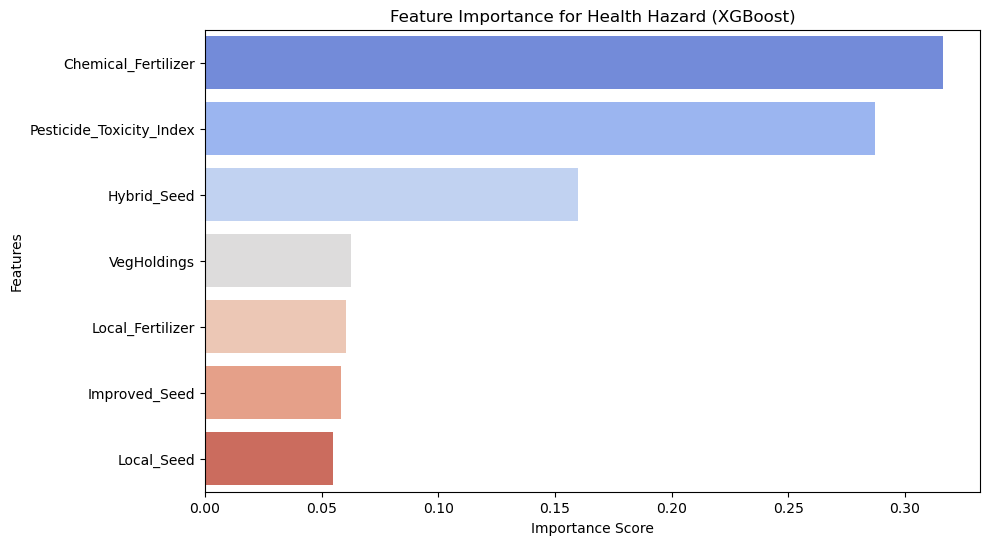

In [80]:

soil_features = [
    'Total_Holdings', 'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index', 'Chemical_Fertilizer_Per_Hectare'
]
X_soil = df[soil_features]
y_soil = df['Soil_Degradation_Risk']

health_features = [
    'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index'
]
X_health = df[health_features]
y_health = df['Health_Hazard_Risk']


from sklearn.model_selection import train_test_split
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(
    X_soil, y_soil, test_size=0.2, random_state=42
)
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X_health, y_health, test_size=0.3, random_state=42
)


model_soil_rf = RandomForestClassifier(random_state=42)
model_soil_rf.fit(X_train_soil, y_train_soil)

model_soil_xgb = XGBClassifier(random_state=42)
model_soil_xgb.fit(X_train_soil, y_train_soil)


model_health_rf = RandomForestClassifier(random_state=42)
model_health_rf.fit(X_train_health, y_train_health)

model_health_xgb = XGBClassifier(random_state=42)
model_health_xgb.fit(X_train_health, y_train_health)


soil_rf_importances = model_soil_rf.feature_importances_
soil_xgb_importances = model_soil_xgb.feature_importances_

soil_rf_importance_df = pd.DataFrame({
    'Feature': soil_features,
    'Importance (Random Forest)': soil_rf_importances
}).sort_values(by='Importance (Random Forest)', ascending=False)

soil_xgb_importance_df = pd.DataFrame({
    'Feature': soil_features,
    'Importance (XGBoost)': soil_xgb_importances
}).sort_values(by='Importance (XGBoost)', ascending=False)

print("Soil Degradation Feature Importance (Random Forest):")
print(soil_rf_importance_df)

print("\nSoil Degradation Feature Importance (XGBoost):")
print(soil_xgb_importance_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (Random Forest)', y='Feature', data=soil_rf_importance_df, palette='viridis')
plt.title('Feature Importance for Soil Degradation (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (XGBoost)', y='Feature', data=soil_xgb_importance_df, palette='coolwarm')
plt.title('Feature Importance for Soil Degradation (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


health_rf_importances = model_health_rf.feature_importances_
health_xgb_importances = model_health_xgb.feature_importances_


health_rf_importance_df = pd.DataFrame({
    'Feature': health_features,
    'Importance (Random Forest)': health_rf_importances
}).sort_values(by='Importance (Random Forest)', ascending=False)

health_xgb_importance_df = pd.DataFrame({
    'Feature': health_features,
    'Importance (XGBoost)': health_xgb_importances
}).sort_values(by='Importance (XGBoost)', ascending=False)

print("Health Hazard Feature Importance (Random Forest):")
print(health_rf_importance_df)

print("\nHealth Hazard Feature Importance (XGBoost):")
print(health_xgb_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (Random Forest)', y='Feature', data=health_rf_importance_df, palette='viridis')
plt.title('Feature Importance for Health Hazard (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (XGBoost)', y='Feature', data=health_xgb_importance_df, palette='coolwarm')
plt.title('Feature Importance for Health Hazard (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

=== Soil Degradation Results ===
Confusion Matrix for Random Forest:
[[12  0]
 [ 1  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.96      0.83      0.88        15
weighted avg       0.94      0.93      0.93        15

Confusion Matrix for XGBoost:
[[11  1]
 [ 2  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.50      0.33      0.40         3

    accuracy                           0.80        15
   macro avg       0.67      0.62      0.64        15
weighted avg       0.78      0.80      0.78        15


=== Health Hazard Results ===
Confusion Matrix for Random Forest:
[[ 1  2]
 [ 1 18]]

Classification Report:
              precision    recall  f1-score   suppo

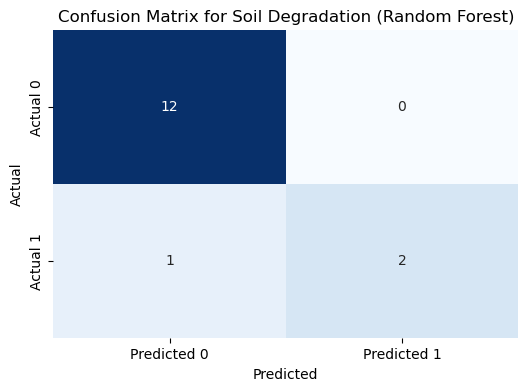

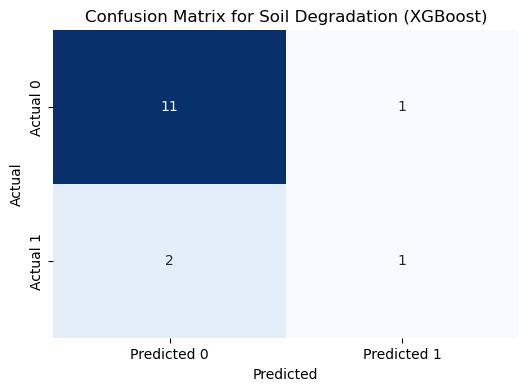

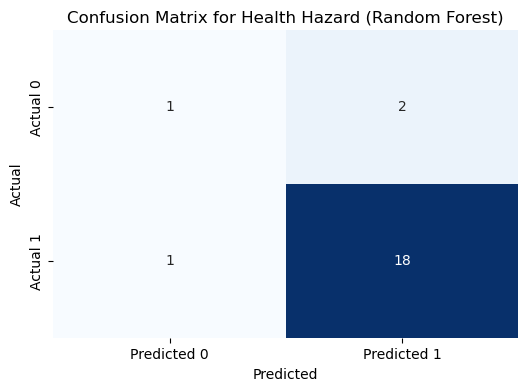

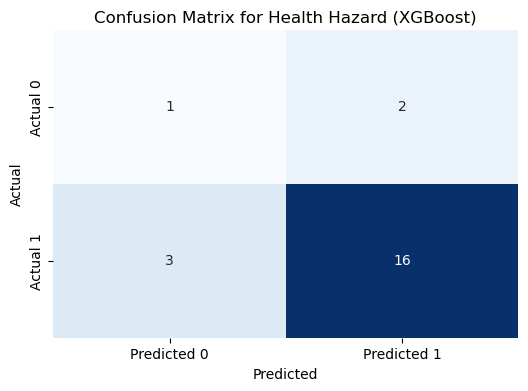

In [82]:
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate Soil Degradation Models
print("=== Soil Degradation Results ===")
evaluate_model(y_test_soil, y_pred_soil_rf, "Random Forest")
evaluate_model(y_test_soil, y_pred_soil_xgb, "XGBoost")

# Evaluate Health Hazard Models
print("\n=== Health Hazard Results ===")
evaluate_model(y_test_health, y_pred_health_rf, "Random Forest")
evaluate_model(y_test_health, y_pred_health_xgb, "XGBoost")


# Visualize Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices for Soil Degradation
cm_soil_rf = confusion_matrix(y_test_soil, y_pred_soil_rf)
plot_confusion_matrix(cm_soil_rf, "Confusion Matrix for Soil Degradation (Random Forest)")

cm_soil_xgb = confusion_matrix(y_test_soil, y_pred_soil_xgb)
plot_confusion_matrix(cm_soil_xgb, "Confusion Matrix for Soil Degradation (XGBoost)")



# Plot confusion matrices for Health Hazard
cm_health_rf = confusion_matrix(y_test_health, y_pred_health_rf)
plot_confusion_matrix(cm_health_rf, "Confusion Matrix for Health Hazard (Random Forest)")

cm_health_xgb = confusion_matrix(y_test_health, y_pred_health_xgb)
plot_confusion_matrix(cm_health_xgb, "Confusion Matrix for Health Hazard (XGBoost)")

